<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Histogram-based-estimation" data-toc-modified-id="Histogram-based-estimation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Histogram based estimation</a></span><ul class="toc-item"><li><span><a href="#Define-the-distribution-with-known-parameters" data-toc-modified-id="Define-the-distribution-with-known-parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Define the distribution with known parameters</a></span></li><li><span><a href="#Estimate-the-distribution-using-the-data-samples-without-any-knowledge-of-parameters" data-toc-modified-id="Estimate-the-distribution-using-the-data-samples-without-any-knowledge-of-parameters-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Estimate the distribution using the data samples without any knowledge of parameters</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import os
from IPython.core.display import HTML
def load_style(directory = '../', name='customMac.css'):  
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

## Histogram based estimation

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
import math
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (9,6),
         'axes.labelsize': 18,
         'axes.titlesize':18,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
pylab.rcParams.update(params)
plt.rcParams.update({'font.size': 14})
rc('text', usetex=True)

### Define the distribution with known parameters

In [3]:
def pdf(x, mu, sigma):
    """
    Calculates the normal distribution's probability density 
    function (PDF).     
    """
    term1 = 1.0 / ( math.sqrt(2*np.pi) * sigma )
    term2 = np.exp( -0.5 * ( (x-mu)/sigma )**2 )
    return term1*term2

In [4]:
# generating some sample data
x1 = np.arange(-10, 10, 0.1)

# probability density functions
pdf1 = pdf(x1, mu=0, sigma=2)

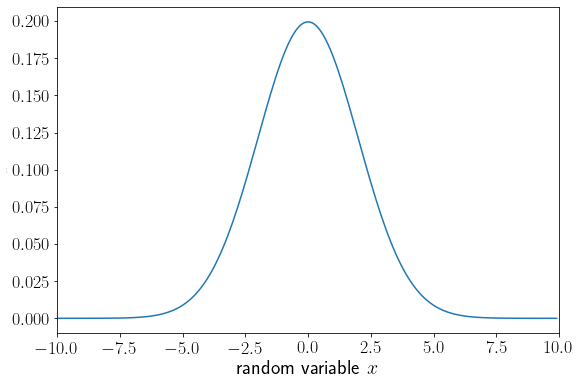

In [5]:
# Class conditional densities (likelihoods)
plt.plot(x1, pdf1)
plt.ylabel('$p(x/\omega_i)$',fontsize=1)
plt.xlabel('random variable $x$',fontsize=20)
plt.xlim([-10,10])
#plt.savefig('classProb.pdf') 
plt.show()

### Estimate the distribution using the data samples without any knowledge of parameters

In [6]:
# Parameters
mu = 0
sigma = 2

# Generating 500 random samples drawn from a Normal Distribution
x = sigma * np.random.randn(1000) + mu

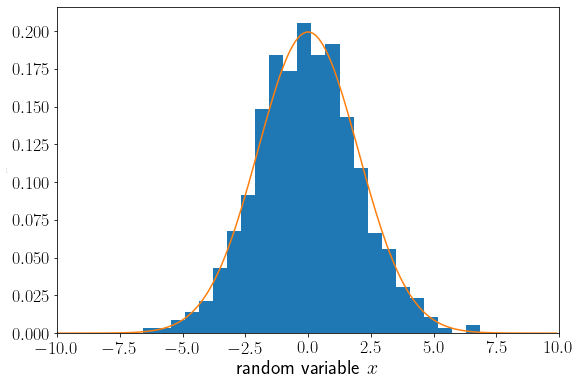

In [7]:
_ = plt.hist(x, bins=24,density=True)  # arguments are passed to np.histogram
plt.plot(x1, pdf1)
plt.ylabel('$p(x/\omega_i)$',fontsize=1)
plt.xlabel('random variable $x$',fontsize=20)
plt.xlim([-10,10])
plt.show()

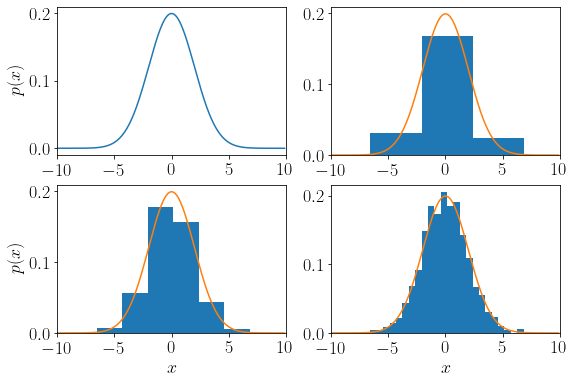

In [8]:
pylab.rcParams.update(params)
plt.rcParams.update({'font.size': 10})
rc('text', usetex=True)

plt.subplot(221)
plt.plot(x1, pdf1)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.xlim([-10,10])

plt.subplot(222)
plt.hist(x, bins=3,density=True)  # arguments are passed to np.histogram
plt.plot(x1, pdf1)
plt.xlabel('$x$')
plt.xlim([-10,10])

plt.subplot(223)
plt.hist(x, bins=6,density=True)  # arguments are passed to np.histogram
plt.plot(x1, pdf1)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.xlim([-10,10])

plt.subplot(224)
plt.hist(x, bins=24,density=True)  # arguments are passed to np.histogram
plt.plot(x1, pdf1)
plt.xlabel('$x$')
plt.xlim([-10,10])

plt.savefig('outputs/binHist.pdf')

In [9]:
A = [0.80, 0.91, 0.93, 0.95, 1.32, 1.53, 1.57, 1.63, 1.67, 1.74,
     2.01, 2.18, 2.27, 2.31, 2.40, 2.61, 2.64, 2.64, 2.67, 2.85,
     2.96, 2.97, 3.17, 3.17, 3.38, 3.67, 3.73, 3.83, 3.99, 4.06,
     4.10, 4.12, 4.18, 4.20, 4.23, 4.27, 4.27, 4.39, 4.40, 4.46,
     4.47, 4.61, 4.64, 4.89, 4.96, 5.12, 5.15, 5.33, 5.33, 5.47,
     5.64, 5.85, 5.99, 6.29, 6.42, 6.53, 6.70, 6.78, 7.18, 7.22]

B = [3.54, 3.88, 4.24, 4.30, 4.30, 4.70, 4.75, 4.97, 5.21, 5.42,
     5.60, 5.77, 5.87, 5.94, 5.95, 6.04, 6.05, 6.15, 6.19, 6.21,
     6.33, 6.41, 6.43, 6.49, 6.52, 6.58, 6.60, 6.63, 6.65, 6.75,
     6.90, 6.92, 7.03, 7.08, 7.18, 7.29, 7.33, 7.41, 7.41, 7.46,
     7.61, 7.67, 7.68, 7.68, 7.78, 7.96, 8.03, 8.12, 8.20, 8.22,
     8.33, 8.36, 8.44, 8.45, 8.49, 8.75, 8.76, 9.14, 9.20, 9.86]

[ 4  6 12  7 16  8  5  2  0  0]
[ 0  0  0  2  6  7 17 14 11  3]


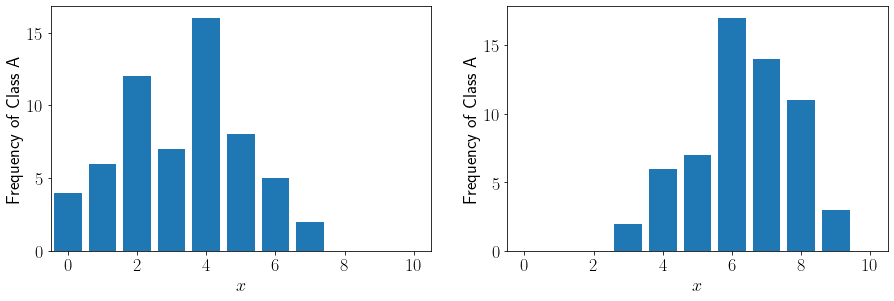

In [10]:
histA,bins = np.histogram(A,bins=[0, 1, 2, 3,4,5,6,7,8,9,10],density=False) 
print(histA)
histB,bins = np.histogram(B,bins=[0, 1, 2, 3,4,5,6,7,8,9,10],density=False) 
print(histB)

plt.figure(figsize=(15,4.5))
pylab.rcParams.update(params)
plt.rcParams.update({'font.size': 10})
rc('text', usetex=True)

plt.subplot(121)
plt.bar(bins[:-1], histA)
plt.xlabel('$x$')
plt.ylabel('Frequency of Class A')
plt.xlim([-0.5,10.5])

plt.subplot(122)
plt.bar(bins[:-1], histB)
plt.xlabel('$x$')
plt.ylabel('Frequency of Class A')
plt.xlim([-0.5,10.5])

plt.savefig('outputs/binHist01.pdf')

[0.06666667 0.1        0.2        0.11666667 0.26666667 0.13333333
 0.08333333 0.03333333 0.         0.        ]
[0.         0.         0.         0.03333333 0.1        0.11666667
 0.28333333 0.23333333 0.18333333 0.05      ]


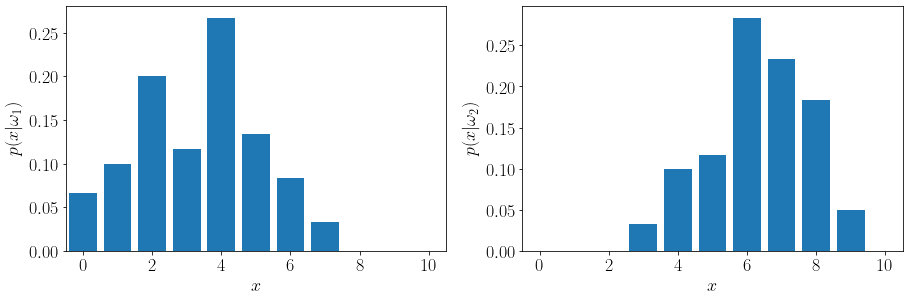

In [11]:
histA,bins = np.histogram(A,bins=[0, 1, 2, 3,4,5,6,7,8,9,10],density=True) 
print(histA)
histB,bins = np.histogram(B,bins=[0, 1, 2, 3,4,5,6,7,8,9,10],density=True) 
print(histB)

plt.figure(figsize=(15,4.5))
pylab.rcParams.update(params)
plt.rcParams.update({'font.size': 10})
rc('text', usetex=True)

plt.subplot(121)
plt.bar(bins[:-1], histA)
plt.xlabel('$x$')
plt.ylabel('$p(x|\omega_1)$')
plt.xlim([-0.5,10.5])

plt.subplot(122)
plt.bar(bins[:-1], histB)
plt.xlabel('$x$')
plt.ylabel('$p(x|\omega_2)$')
plt.xlim([-0.5,10.5])

plt.savefig('outputs/binHist02.pdf')

In [68]:
bins[:-2]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [47]:
nSamples = len(A)
nBins = int(math.sqrt(nSamples))+1

histA = np.histogram(A,bins=nBins,density=True)
histB = np.histogram(B,bins=nBins,density=True)
xd = 7.5
res = next(x for x, val in enumerate(histB[1]) if val > xd)

In [50]:
print(res-1)

5


In [51]:
PosteriorProbB = histB[0][res-1]


In [52]:
print(PosteriorProbB)

0.21097046413502132
